Mean Squared Error: 4.082628398521856
R² Score: 0.9889832909573145


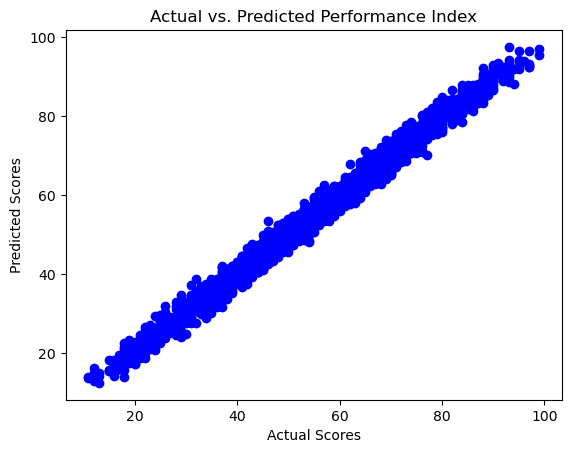

In [5]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("student_performance.csv")

df.columns = df.columns.str.strip()

FEATURES = ["Hours Studied", "Previous Scores", "Extracurricular Activities",
            "Sleep Hours", "Sample Question Papers Practiced"]
TARGET = "Performance Index"

df = df.dropna(subset=FEATURES + [TARGET])

for col in FEATURES:
    if df[col].dtype == 'object': 
        df[col] = df[col].astype('category').cat.codes 

X = df[FEATURES]
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

joblib.dump(model, "student_model.pkl")

plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs. Predicted Performance Index")
plt.show()
